<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
import tensorflow as tf 

data = np.load('../quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

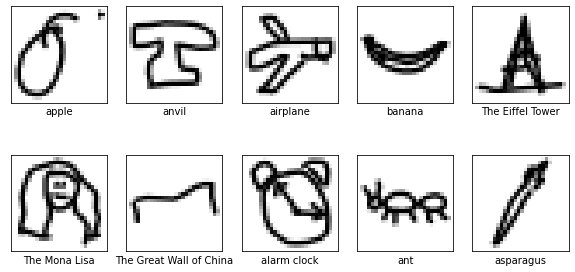

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [9]:
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [20]:
# normalize input
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# X[0]
# TTS

In [19]:
# instatiate the model
model = tf.keras.Sequential()
# create layers - tell it how to train
model.add(tf.keras.layers.Dense(32, activation="relu", input_dim=784)) # hidden layer?
model.add(tf.keras.layers.Dense(10, activation="softmax")) # ouput layer?
# compile - tell it how to adjust weights
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [31]:
# fit
import time
start_time = time.time()
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.8968 - val_loss: 0.6965 - val_accuracy: 0.8246
Epoch 2/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3400 - accuracy: 0.8978 - val_loss: 0.6933 - val_accuracy: 0.8268
Epoch 3/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8978 - val_loss: 0.7059 - val_accuracy: 0.8233
Epoch 4/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8977 - val_loss: 0.7069 - val_accuracy: 0.8259
Epoch 5/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8984 - val_loss: 0.7061 - val_accuracy: 0.8233
Epoch 6/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8985 - val_loss: 0.7112 - val_accuracy: 0.8264
Epoch 7/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.3359 - accuracy: 0.8992 - val_loss: 0.7028 - val_accuracy:

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [52]:
# model.history.history

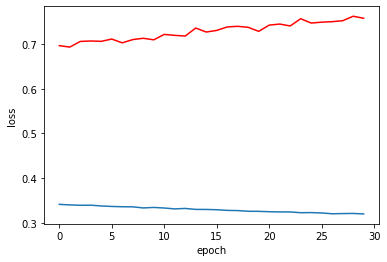

In [50]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(model.history.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df, color="r")
ax = sns.lineplot(x='epoch', y='loss', data=df);

### 1st epoch because that's when the val loss was lowest therefore yeilding the besst accuracy

In [49]:
df.head()

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.896821,0.341237,0.824606,0.696452,0
1,0.897776,0.340039,0.826849,0.693260,1
2,0.897821,0.339180,0.823273,0.705919,2
3,0.897731,0.339366,0.825909,0.706904,3
4,0.898418,0.337695,0.823333,0.706108,4


## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [44]:
model2 = tf.keras.Sequential()
# create layers - tell it how to train
model2.add(tf.keras.layers.Dense(32, activation="relu", input_dim=784)) # hidden layer?
model2.add(tf.keras.layers.Dense(10, activation="softmax")) # ouput layer?
# compile - tell it how to adjust weights
model2.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [45]:
start_time = time.time()
model2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
2094/2094 [==============================] - 4s 2ms/step - loss: 1.1936 - accuracy: 0.6378 - val_loss: 0.9208 - val_accuracy: 0.7291
Epoch 2/30
2094/2094 [==============================] - 3s 2ms/step - loss: 0.8646 - accuracy: 0.7474 - val_loss: 0.8369 - val_accuracy: 0.7574
Epoch 3/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7996 - accuracy: 0.7685 - val_loss: 0.7903 - val_accuracy: 0.7722
Epoch 4/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7560 - accuracy: 0.7813 - val_loss: 0.7538 - val_accuracy: 0.7838
Epoch 5/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.7214 - accuracy: 0.7920 - val_loss: 0.7272 - val_accuracy: 0.7916
Epoch 6/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.7999 - val_loss: 0.7075 - val_accuracy: 0.7964
Epoch 7/30
2094/2094 [==============================] - 4s 2ms/step - loss: 0.6700 - accuracy: 0.8055 - val_loss: 0.6866 - val_accuracy:

In [66]:
loss_df = pd.DataFrame.from_records(model.history.history)
loss_df.rename(dict(zip(loss_df.columns, ['adam_loss', "adam_accuracy", 'adam_val_loss', "adam_val_accuracy"])), axis=1, inplace=True)
loss_df = pd.concat([loss_df, pd.DataFrame.from_records(model2.history.history)], axis=1)
loss_df['epoch'] = [i for i in range(loss_df.shape[0])]
loss_df.head(1)

,adam_loss,adam_accuracy,adam_val_loss,adam_val_accuracy,accuracy,loss,val_accuracy,val_loss,epoch
0,0.896821,0.341237,0.824606,0.696452,0.637806,1.193552,0.729091,0.920774,0


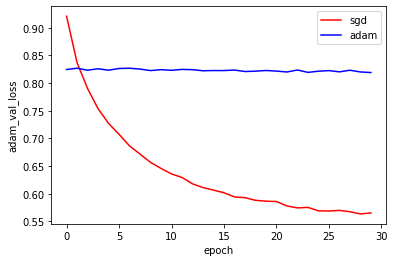

In [72]:
ax = sns.lineplot(x='epoch', y='val_loss', data=loss_df, color="r", label="sgd")
ax = sns.lineplot(x='epoch', y='adam_val_loss', data=loss_df, color="b", label="adam");

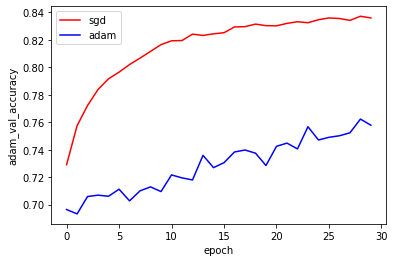

In [73]:
ax = sns.lineplot(x='epoch', y='val_accuracy', data=loss_df, color="r", label="sgd")
ax = sns.lineplot(x='epoch', y='adam_val_accuracy', data=loss_df, color="b", label="adam");

# I think i have to re run the cells, these graphs don't amke sense look up to where each model is trained, you can se the val acccuracy from adam gets to 81 and sgd gets to 83 but this graph fdoen't reflect that

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)